In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
araria_meteo = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Metrological Data/Araria.csv', skiprows = 2, delimiter=',')
araria_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,12.2,0.0,96,1010.2,6.6,18.5,283,283
1,2024-01-01T01:00,12.0,0.0,96,1011.5,6.6,17.6,292,296
2,2024-01-01T02:00,13.0,0.0,93,1012.0,9.6,18.2,283,288
3,2024-01-01T03:00,14.8,0.0,86,1012.7,7.6,17.6,275,285
4,2024-01-01T04:00,16.9,0.0,78,1012.9,7.3,10.4,281,284
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.5,0.0,94,1010.0,11.7,24.7,280,284
8780,2024-12-31T20:00,13.9,0.0,96,1009.1,11.3,23.9,279,284
8781,2024-12-31T21:00,13.3,0.0,96,1008.5,9.6,21.4,273,281
8782,2024-12-31T22:00,12.8,0.0,96,1008.2,8.5,19.9,264,274


In [3]:
araria_pollutants = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Pollutants/Araria.csv', delimiter= ',')
araria_pollutants['Timestamp'] = araria_meteo['time']
araria_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
araria_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,68.50,124.67,2.55,5.55,5.05,24.33,13.80,0.92,12.65,...,NaN,13.07,91.00,0.8,293.50,0.0,0.0,11.75,NaN,NaN
1,2024-01-01T01:00,61.25,132.00,2.45,5.50,4.95,24.22,14.00,0.92,14.25,...,NaN,13.05,91.00,0.8,297.75,0.0,0.0,12.00,NaN,NaN
2,2024-01-01T02:00,58.00,116.33,2.05,5.88,4.78,24.18,14.00,0.91,12.62,...,NaN,13.00,91.00,0.8,294.25,0.0,0.0,12.00,NaN,NaN
3,2024-01-01T03:00,53.25,122.50,2.28,5.85,4.97,23.95,13.92,0.86,13.45,...,NaN,12.70,92.00,0.8,290.25,0.0,0.0,12.00,NaN,NaN
4,2024-01-01T04:00,49.50,108.00,2.38,5.65,4.95,23.65,13.88,0.84,14.30,...,NaN,12.55,92.00,0.8,293.25,0.0,0.0,11.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,95.00,141.00,2.50,5.62,5.00,30.62,16.88,0.92,3.10,...,NaN,16.40,86.25,NaN,NaN,0.0,0.0,8.00,NaN,NaN
8780,2024-12-31T20:00,85.50,164.50,2.45,5.62,5.00,29.42,16.27,0.80,2.70,...,NaN,15.78,87.00,NaN,NaN,0.0,0.0,8.00,NaN,NaN
8781,2024-12-31T21:00,79.25,151.00,2.42,5.60,5.00,28.80,15.80,0.64,NaN,...,NaN,15.35,87.00,NaN,NaN,0.0,0.0,8.00,NaN,NaN
8782,2024-12-31T22:00,57.00,105.00,2.45,5.60,5.00,28.30,15.42,0.52,4.55,...,NaN,14.72,88.25,NaN,NaN,0.0,0.0,8.00,NaN,NaN


In [4]:
araria = pd.merge(araria_meteo.iloc[:, :], araria_pollutants.iloc[:, 0:3], on='time')
araria

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,12.2,0.0,96,1010.2,6.6,18.5,283,283,68.50,124.67
1,2024-01-01T01:00,12.0,0.0,96,1011.5,6.6,17.6,292,296,61.25,132.00
2,2024-01-01T02:00,13.0,0.0,93,1012.0,9.6,18.2,283,288,58.00,116.33
3,2024-01-01T03:00,14.8,0.0,86,1012.7,7.6,17.6,275,285,53.25,122.50
4,2024-01-01T04:00,16.9,0.0,78,1012.9,7.3,10.4,281,284,49.50,108.00
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.5,0.0,94,1010.0,11.7,24.7,280,284,95.00,141.00
8780,2024-12-31T20:00,13.9,0.0,96,1009.1,11.3,23.9,279,284,85.50,164.50
8781,2024-12-31T21:00,13.3,0.0,96,1008.5,9.6,21.4,273,281,79.25,151.00
8782,2024-12-31T22:00,12.8,0.0,96,1008.2,8.5,19.9,264,274,57.00,105.00


In [5]:
araria['city'] = 'Araria'
araria

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,12.2,0.0,96,1010.2,6.6,18.5,283,283,68.50,124.67,Araria
1,2024-01-01T01:00,12.0,0.0,96,1011.5,6.6,17.6,292,296,61.25,132.00,Araria
2,2024-01-01T02:00,13.0,0.0,93,1012.0,9.6,18.2,283,288,58.00,116.33,Araria
3,2024-01-01T03:00,14.8,0.0,86,1012.7,7.6,17.6,275,285,53.25,122.50,Araria
4,2024-01-01T04:00,16.9,0.0,78,1012.9,7.3,10.4,281,284,49.50,108.00,Araria
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.5,0.0,94,1010.0,11.7,24.7,280,284,95.00,141.00,Araria
8780,2024-12-31T20:00,13.9,0.0,96,1009.1,11.3,23.9,279,284,85.50,164.50,Araria
8781,2024-12-31T21:00,13.3,0.0,96,1008.5,9.6,21.4,273,281,79.25,151.00,Araria
8782,2024-12-31T22:00,12.8,0.0,96,1008.2,8.5,19.9,264,274,57.00,105.00,Araria


In [6]:
araria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             6212 non-null   float64
 10  PM10 (µg/m³)              6274 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
araria = araria.interpolate()
araria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    araria[delay1_col] = araria[col].shift(1)
    delay2_col = col + "_delay2"
    araria[delay2_col] = araria[col].shift(2)
    araria.loc[0, delay1_col] = araria[col].iloc[-1]
    araria.loc[1, delay2_col] = araria[col].iloc[-1]
    araria.loc[0, delay2_col] = araria[col].iloc[-2]

araria

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,12.2,0.0,96,1010.2,6.6,18.5,283,283,68.50,124.67,Araria,57.25,57.00,106.00,105.00
1,2024-01-01T01:00,12.0,0.0,96,1011.5,6.6,17.6,292,296,61.25,132.00,Araria,68.50,57.25,124.67,106.00
2,2024-01-01T02:00,13.0,0.0,93,1012.0,9.6,18.2,283,288,58.00,116.33,Araria,61.25,68.50,132.00,124.67
3,2024-01-01T03:00,14.8,0.0,86,1012.7,7.6,17.6,275,285,53.25,122.50,Araria,58.00,61.25,116.33,132.00
4,2024-01-01T04:00,16.9,0.0,78,1012.9,7.3,10.4,281,284,49.50,108.00,Araria,53.25,58.00,122.50,116.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.5,0.0,94,1010.0,11.7,24.7,280,284,95.00,141.00,Araria,84.50,61.25,156.00,122.75
8780,2024-12-31T20:00,13.9,0.0,96,1009.1,11.3,23.9,279,284,85.50,164.50,Araria,95.00,84.50,141.00,156.00
8781,2024-12-31T21:00,13.3,0.0,96,1008.5,9.6,21.4,273,281,79.25,151.00,Araria,85.50,95.00,164.50,141.00
8782,2024-12-31T22:00,12.8,0.0,96,1008.2,8.5,19.9,264,274,57.00,105.00,Araria,79.25,85.50,151.00,164.50


In [9]:
arrah_meteo = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Metrological Data/Arrah.csv', skiprows=2, delimiter=',')
arrah_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,8.0,0.0,100,1009.6,6.9,11.6,261,275
1,2024-01-01T01:00,8.6,0.0,100,1011.2,5.2,11.3,286,301
2,2024-01-01T02:00,8.9,0.0,99,1011.8,4.8,10.6,283,305
3,2024-01-01T03:00,10.5,0.0,98,1012.7,4.4,9.3,279,306
4,2024-01-01T04:00,11.4,0.0,96,1012.9,3.7,7.1,281,294
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.4,0.0,95,1010.6,9.8,22.1,288,292
8780,2024-12-31T20:00,11.0,0.0,95,1009.8,9.0,21.2,286,291
8781,2024-12-31T21:00,10.7,0.0,95,1009.2,9.5,21.8,285,290
8782,2024-12-31T22:00,10.4,0.0,96,1009.0,10.4,22.8,280,284


In [10]:
arrah_pollutants = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Pollutants/Arrah.csv', delimiter= ',')
arrah_pollutants['Timestamp'] = arrah_meteo['time']
arrah_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
arrah_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,107.75,NaN,0.92,10.65,6.40,16.30,15.50,0.12,14.58,...,0.40,11.28,90.50,0.68,138.00,0.0,0.0,16.50,NaN,NaN
1,2024-01-01T01:00,112.25,NaN,1.10,10.92,6.48,16.27,14.18,0.12,14.88,...,0.35,11.22,91.00,0.65,121.00,0.0,0.0,16.75,NaN,NaN
2,2024-01-01T02:00,108.00,NaN,1.65,13.02,8.25,16.45,15.22,0.23,14.88,...,0.32,11.28,91.00,0.62,48.75,0.0,0.0,16.50,NaN,NaN
3,2024-01-01T03:00,115.50,NaN,1.35,10.55,6.72,17.30,15.08,0.20,15.20,...,0.30,11.25,91.00,0.60,192.00,0.0,0.0,16.25,NaN,NaN
4,2024-01-01T04:00,120.50,NaN,0.90,11.75,6.98,17.15,14.35,0.13,14.80,...,0.30,11.25,91.00,0.68,141.75,0.0,0.0,16.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,36.00,2.65,5.52,5.10,5.15,7.28,0.37,28.05,...,0.50,14.55,82.00,0.43,190.50,0.0,0.0,13.00,NaN,NaN
8780,2024-12-31T20:00,32.00,36.00,2.25,6.60,5.35,5.10,7.50,0.32,22.20,...,0.45,13.63,85.00,0.40,NaN,0.0,0.0,13.00,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,2.52,6.10,5.30,5.20,7.70,0.36,6.65,...,0.45,13.05,87.00,0.45,260.50,0.0,0.0,13.00,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,3.02,4.78,4.97,5.05,7.35,0.43,12.72,...,0.57,12.72,87.75,0.48,265.50,0.0,0.0,13.00,NaN,NaN


In [11]:
arrah = pd.merge(arrah_meteo.iloc[:, :], arrah_pollutants.iloc[:, 0:3], on='time')
arrah

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,8.0,0.0,100,1009.6,6.9,11.6,261,275,107.75,NaN
1,2024-01-01T01:00,8.6,0.0,100,1011.2,5.2,11.3,286,301,112.25,NaN
2,2024-01-01T02:00,8.9,0.0,99,1011.8,4.8,10.6,283,305,108.00,NaN
3,2024-01-01T03:00,10.5,0.0,98,1012.7,4.4,9.3,279,306,115.50,NaN
4,2024-01-01T04:00,11.4,0.0,96,1012.9,3.7,7.1,281,294,120.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.4,0.0,95,1010.6,9.8,22.1,288,292,NaN,36.00
8780,2024-12-31T20:00,11.0,0.0,95,1009.8,9.0,21.2,286,291,32.00,36.00
8781,2024-12-31T21:00,10.7,0.0,95,1009.2,9.5,21.8,285,290,NaN,NaN
8782,2024-12-31T22:00,10.4,0.0,96,1009.0,10.4,22.8,280,284,NaN,NaN


In [12]:
arrah['city'] = 'Arrah'
arrah

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,8.0,0.0,100,1009.6,6.9,11.6,261,275,107.75,NaN,Arrah
1,2024-01-01T01:00,8.6,0.0,100,1011.2,5.2,11.3,286,301,112.25,NaN,Arrah
2,2024-01-01T02:00,8.9,0.0,99,1011.8,4.8,10.6,283,305,108.00,NaN,Arrah
3,2024-01-01T03:00,10.5,0.0,98,1012.7,4.4,9.3,279,306,115.50,NaN,Arrah
4,2024-01-01T04:00,11.4,0.0,96,1012.9,3.7,7.1,281,294,120.50,NaN,Arrah
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.4,0.0,95,1010.6,9.8,22.1,288,292,NaN,36.00,Arrah
8780,2024-12-31T20:00,11.0,0.0,95,1009.8,9.0,21.2,286,291,32.00,36.00,Arrah
8781,2024-12-31T21:00,10.7,0.0,95,1009.2,9.5,21.8,285,290,NaN,NaN,Arrah
8782,2024-12-31T22:00,10.4,0.0,96,1009.0,10.4,22.8,280,284,NaN,NaN,Arrah


In [13]:
arrah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             6222 non-null   float64
 10  PM10 (µg/m³)              5921 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
arrah = arrah.interpolate()
arrah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8748 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [15]:
for column in arrah.columns:
    arrah[column].fillna(arrah[column].mode()[0], inplace=True)

arrah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [16]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    arrah[delay1_col] = arrah[col].shift(1)
    delay2_col = col + "_delay2"
    arrah[delay2_col] = arrah[col].shift(2)
    arrah.loc[0, delay1_col] = arrah[col].iloc[-1]
    arrah.loc[1, delay2_col] = arrah[col].iloc[-1]
    arrah.loc[0, delay2_col] = arrah[col].iloc[-2]

arrah

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,8.0,0.0,100,1009.6,6.9,11.6,261,275,107.75,72.000000,Arrah,25.25,27.50,39.250000,38.166667
1,2024-01-01T01:00,8.6,0.0,100,1011.2,5.2,11.3,286,301,112.25,72.000000,Arrah,107.75,25.25,72.000000,39.250000
2,2024-01-01T02:00,8.9,0.0,99,1011.8,4.8,10.6,283,305,108.00,72.000000,Arrah,112.25,107.75,72.000000,72.000000
3,2024-01-01T03:00,10.5,0.0,98,1012.7,4.4,9.3,279,306,115.50,72.000000,Arrah,108.00,112.25,72.000000,72.000000
4,2024-01-01T04:00,11.4,0.0,96,1012.9,3.7,7.1,281,294,120.50,72.000000,Arrah,115.50,108.00,72.000000,72.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.4,0.0,95,1010.6,9.8,22.1,288,292,32.00,36.000000,Arrah,32.00,26.75,48.000000,48.000000
8780,2024-12-31T20:00,11.0,0.0,95,1009.8,9.0,21.2,286,291,32.00,36.000000,Arrah,32.00,32.00,36.000000,48.000000
8781,2024-12-31T21:00,10.7,0.0,95,1009.2,9.5,21.8,285,290,29.75,37.083333,Arrah,32.00,32.00,36.000000,36.000000
8782,2024-12-31T22:00,10.4,0.0,96,1009.0,10.4,22.8,280,284,27.50,38.166667,Arrah,29.75,32.00,37.083333,36.000000


In [17]:
aurangabad_meteo = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Metrological Data/Aurangabad.csv', skiprows=2, delimiter=',')
aurangabad_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,9.4,0.0,99,1003.9,3.1,3.1,225,234
1,2024-01-01T01:00,9.3,0.0,100,1005.3,3.4,4.0,238,243
2,2024-01-01T02:00,9.7,0.0,98,1006.1,3.9,4.8,236,243
3,2024-01-01T03:00,10.8,0.0,98,1006.9,4.3,4.6,228,225
4,2024-01-01T04:00,12.1,0.0,95,1007.2,4.3,4.6,228,231
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.5,0.0,95,1004.9,8.0,19.3,301,307
8780,2024-12-31T20:00,11.0,0.0,97,1004.3,6.5,17.1,302,304
8781,2024-12-31T21:00,10.7,0.0,97,1003.7,6.3,16.8,297,299
8782,2024-12-31T22:00,10.6,0.0,97,1003.5,7.7,18.8,295,294


In [18]:
aurangabad_pollutants = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Pollutants/Aurangabad.csv', delimiter= ',')
aurangabad_pollutants['Timestamp'] = aurangabad_meteo['time']
aurangabad_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
aurangabad_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,84.30,144.26,3.46,24.68,13.05,7.56,9.48,0.90,11.47,...,3.75,18.44,68.85,1.37,145.65,0.0,0.0,3.58,NaN,NaN
1,2024-01-01T01:00,80.62,142.68,3.63,21.62,11.58,7.53,9.78,1.03,11.26,...,3.59,17.87,70.03,1.36,142.13,0.0,0.0,3.50,NaN,NaN
2,2024-01-01T02:00,79.93,124.48,3.65,20.25,10.87,7.60,9.75,1.10,11.12,...,3.36,17.61,69.68,1.75,162.96,0.0,0.0,3.50,NaN,NaN
3,2024-01-01T03:00,80.33,121.83,3.62,19.32,10.36,7.52,10.59,1.12,11.39,...,3.18,17.12,71.12,1.88,153.89,0.0,0.0,3.67,NaN,NaN
4,2024-01-01T04:00,75.95,106.04,3.68,17.81,9.62,7.62,10.58,1.09,10.78,...,2.88,16.77,72.85,1.52,156.05,0.0,0.0,3.67,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,73.47,150.04,3.72,21.48,10.10,15.38,5.26,1.00,37.14,...,2.31,22.80,69.72,1.01,238.58,0.0,0.0,3.50,NaN,NaN
8780,2024-12-31T20:00,65.98,146.92,3.99,22.66,12.18,14.99,6.76,1.19,31.38,...,2.69,21.93,74.12,1.02,250.55,0.0,0.0,3.67,NaN,NaN
8781,2024-12-31T21:00,69.52,148.13,3.94,28.66,14.67,15.50,8.24,1.80,18.03,...,2.80,21.27,77.30,1.06,250.80,0.0,0.0,3.67,NaN,NaN
8782,2024-12-31T22:00,68.24,144.40,4.78,27.04,14.82,14.86,8.68,2.12,21.73,...,1.58,20.58,78.88,1.16,239.80,0.0,0.0,3.67,NaN,NaN


In [19]:
aurangabad = pd.merge(aurangabad_meteo.iloc[:, :], aurangabad_pollutants.iloc[:, 0:3], on='time')
aurangabad

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,9.4,0.0,99,1003.9,3.1,3.1,225,234,84.30,144.26
1,2024-01-01T01:00,9.3,0.0,100,1005.3,3.4,4.0,238,243,80.62,142.68
2,2024-01-01T02:00,9.7,0.0,98,1006.1,3.9,4.8,236,243,79.93,124.48
3,2024-01-01T03:00,10.8,0.0,98,1006.9,4.3,4.6,228,225,80.33,121.83
4,2024-01-01T04:00,12.1,0.0,95,1007.2,4.3,4.6,228,231,75.95,106.04
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.5,0.0,95,1004.9,8.0,19.3,301,307,73.47,150.04
8780,2024-12-31T20:00,11.0,0.0,97,1004.3,6.5,17.1,302,304,65.98,146.92
8781,2024-12-31T21:00,10.7,0.0,97,1003.7,6.3,16.8,297,299,69.52,148.13
8782,2024-12-31T22:00,10.6,0.0,97,1003.5,7.7,18.8,295,294,68.24,144.40


In [20]:
aurangabad['city'] = 'Aurangabad'
aurangabad

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,9.4,0.0,99,1003.9,3.1,3.1,225,234,84.30,144.26,Aurangabad
1,2024-01-01T01:00,9.3,0.0,100,1005.3,3.4,4.0,238,243,80.62,142.68,Aurangabad
2,2024-01-01T02:00,9.7,0.0,98,1006.1,3.9,4.8,236,243,79.93,124.48,Aurangabad
3,2024-01-01T03:00,10.8,0.0,98,1006.9,4.3,4.6,228,225,80.33,121.83,Aurangabad
4,2024-01-01T04:00,12.1,0.0,95,1007.2,4.3,4.6,228,231,75.95,106.04,Aurangabad
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.5,0.0,95,1004.9,8.0,19.3,301,307,73.47,150.04,Aurangabad
8780,2024-12-31T20:00,11.0,0.0,97,1004.3,6.5,17.1,302,304,65.98,146.92,Aurangabad
8781,2024-12-31T21:00,10.7,0.0,97,1003.7,6.3,16.8,297,299,69.52,148.13,Aurangabad
8782,2024-12-31T22:00,10.6,0.0,97,1003.5,7.7,18.8,295,294,68.24,144.40,Aurangabad


In [21]:
aurangabad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8730 non-null   float64
 10  PM10 (µg/m³)              8778 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [22]:
aurangabad = aurangabad.interpolate()
aurangabad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [23]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    aurangabad[delay1_col] = aurangabad[col].shift(1)
    delay2_col = col + "_delay2"
    aurangabad[delay2_col] = aurangabad[col].shift(2)
    aurangabad.loc[0, delay1_col] = aurangabad[col].iloc[-1]
    aurangabad.loc[1, delay2_col] = aurangabad[col].iloc[-1]
    aurangabad.loc[0, delay2_col] = aurangabad[col].iloc[-2]

aurangabad

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,9.4,0.0,99,1003.9,3.1,3.1,225,234,84.30,144.26,Aurangabad,81.61,68.24,163.79,144.40
1,2024-01-01T01:00,9.3,0.0,100,1005.3,3.4,4.0,238,243,80.62,142.68,Aurangabad,84.30,81.61,144.26,163.79
2,2024-01-01T02:00,9.7,0.0,98,1006.1,3.9,4.8,236,243,79.93,124.48,Aurangabad,80.62,84.30,142.68,144.26
3,2024-01-01T03:00,10.8,0.0,98,1006.9,4.3,4.6,228,225,80.33,121.83,Aurangabad,79.93,80.62,124.48,142.68
4,2024-01-01T04:00,12.1,0.0,95,1007.2,4.3,4.6,228,231,75.95,106.04,Aurangabad,80.33,79.93,121.83,124.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.5,0.0,95,1004.9,8.0,19.3,301,307,73.47,150.04,Aurangabad,49.31,42.17,111.14,97.34
8780,2024-12-31T20:00,11.0,0.0,97,1004.3,6.5,17.1,302,304,65.98,146.92,Aurangabad,73.47,49.31,150.04,111.14
8781,2024-12-31T21:00,10.7,0.0,97,1003.7,6.3,16.8,297,299,69.52,148.13,Aurangabad,65.98,73.47,146.92,150.04
8782,2024-12-31T22:00,10.6,0.0,97,1003.5,7.7,18.8,295,294,68.24,144.40,Aurangabad,69.52,65.98,148.13,146.92


In [24]:
begusarai_meteo = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Metrological Data/Begusarai.csv', skiprows=2, delimiter=',')
begusarai_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,10.3,0.0,99,1011.8,6.2,15.6,249,263
1,2024-01-01T01:00,10.6,0.0,99,1013.3,5.8,14.3,274,282
2,2024-01-01T02:00,11.1,0.0,98,1013.9,7.6,11.4,278,283
3,2024-01-01T03:00,12.4,0.0,93,1014.7,8.0,8.8,280,279
4,2024-01-01T04:00,14.6,0.0,86,1014.9,6.8,8.6,270,270
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.3,0.0,93,1012.2,10.8,22.4,296,298
8780,2024-12-31T20:00,12.8,0.0,94,1011.6,10.7,22.0,282,287
8781,2024-12-31T21:00,12.4,0.0,95,1010.8,9.9,20.8,273,279
8782,2024-12-31T22:00,12.0,0.0,95,1010.4,10.1,20.9,268,273


In [25]:
begusarai_pollutants = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Pollutants/Begusarai.csv', delimiter= ',')
begusarai_pollutants['Timestamp'] = begusarai_meteo['time']
begusarai_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
begusarai_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,785.00,875.00,0.550,16.425,9.200,34.175,10.825,NaN,1.233333,...,0.725,19.375,96.00,0.200,211.25,0.0,0.0,9.25,NaN,NaN
1,2024-01-01T01:00,660.50,850.00,0.575,14.875,8.350,33.050,10.450,NaN,0.666667,...,0.725,19.175,96.00,0.125,254.25,0.0,0.0,9.50,NaN,NaN
2,2024-01-01T02:00,604.75,726.00,0.650,14.150,8.050,32.775,10.450,NaN,1.333333,...,0.275,18.925,96.50,0.200,235.25,0.0,0.0,9.25,NaN,NaN
3,2024-01-01T03:00,408.00,490.50,0.800,8.900,5.375,25.575,10.375,NaN,5.300000,...,0.200,19.525,97.25,0.425,149.75,0.0,0.0,8.75,NaN,NaN
4,2024-01-01T04:00,135.50,278.25,0.600,6.175,3.775,17.700,10.225,NaN,9.200000,...,0.125,19.450,98.00,0.450,160.25,0.0,0.0,9.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8756,2024-12-30T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8757,2024-12-30T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8758,2024-12-30T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [26]:
begusarai = pd.merge(begusarai_meteo.iloc[:, :], begusarai_pollutants.iloc[:, 0:3], on='time')
begusarai

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,10.3,0.0,99,1011.8,6.2,15.6,249,263,785.00,875.00
1,2024-01-01T01:00,10.6,0.0,99,1013.3,5.8,14.3,274,282,660.50,850.00
2,2024-01-01T02:00,11.1,0.0,98,1013.9,7.6,11.4,278,283,604.75,726.00
3,2024-01-01T03:00,12.4,0.0,93,1014.7,8.0,8.8,280,279,408.00,490.50
4,2024-01-01T04:00,14.6,0.0,86,1014.9,6.8,8.6,270,270,135.50,278.25
...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,14.6,0.0,94,1013.6,5.9,15.2,315,319,NaN,NaN
8756,2024-12-30T20:00,14.3,0.0,94,1013.0,6.3,15.4,297,307,NaN,NaN
8757,2024-12-30T21:00,13.9,0.0,95,1012.5,5.8,14.8,277,294,NaN,NaN
8758,2024-12-30T22:00,13.4,0.0,96,1012.2,5.4,14.2,268,288,NaN,NaN


In [27]:
begusarai['city'] = 'Begusarai'
begusarai

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,10.3,0.0,99,1011.8,6.2,15.6,249,263,785.00,875.00,Begusarai
1,2024-01-01T01:00,10.6,0.0,99,1013.3,5.8,14.3,274,282,660.50,850.00,Begusarai
2,2024-01-01T02:00,11.1,0.0,98,1013.9,7.6,11.4,278,283,604.75,726.00,Begusarai
3,2024-01-01T03:00,12.4,0.0,93,1014.7,8.0,8.8,280,279,408.00,490.50,Begusarai
4,2024-01-01T04:00,14.6,0.0,86,1014.9,6.8,8.6,270,270,135.50,278.25,Begusarai
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,14.6,0.0,94,1013.6,5.9,15.2,315,319,NaN,NaN,Begusarai
8756,2024-12-30T20:00,14.3,0.0,94,1013.0,6.3,15.4,297,307,NaN,NaN,Begusarai
8757,2024-12-30T21:00,13.9,0.0,95,1012.5,5.8,14.8,277,294,NaN,NaN,Begusarai
8758,2024-12-30T22:00,13.4,0.0,96,1012.2,5.4,14.2,268,288,NaN,NaN,Begusarai


In [28]:
begusarai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8760 non-null   object 
 1   temperature_2m (°C)       8760 non-null   float64
 2   rain (mm)                 8760 non-null   float64
 3   relative_humidity_2m (%)  8760 non-null   int64  
 4   surface_pressure (hPa)    8760 non-null   float64
 5   wind_speed_10m (km/h)     8760 non-null   float64
 6   wind_speed_100m (km/h)    8760 non-null   float64
 7   wind_direction_10m (°)    8760 non-null   int64  
 8   wind_direction_100m (°)   8760 non-null   int64  
 9   PM2.5 (µg/m³)             5763 non-null   float64
 10  PM10 (µg/m³)              5819 non-null   float64
 11  city                      8760 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 821.4+ KB


In [29]:
begusarai = begusarai.interpolate()
begusarai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8760 non-null   object 
 1   temperature_2m (°C)       8760 non-null   float64
 2   rain (mm)                 8760 non-null   float64
 3   relative_humidity_2m (%)  8760 non-null   int64  
 4   surface_pressure (hPa)    8760 non-null   float64
 5   wind_speed_10m (km/h)     8760 non-null   float64
 6   wind_speed_100m (km/h)    8760 non-null   float64
 7   wind_direction_10m (°)    8760 non-null   int64  
 8   wind_direction_100m (°)   8760 non-null   int64  
 9   PM2.5 (µg/m³)             8760 non-null   float64
 10  PM10 (µg/m³)              8760 non-null   float64
 11  city                      8760 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 821.4+ KB


In [30]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    begusarai[delay1_col] = begusarai[col].shift(1)
    delay2_col = col + "_delay2"
    begusarai[delay2_col] = begusarai[col].shift(2)
    begusarai.loc[0, delay1_col] = begusarai[col].iloc[-1]
    begusarai.loc[1, delay2_col] = begusarai[col].iloc[-1]
    begusarai.loc[0, delay2_col] = begusarai[col].iloc[-2]

begusarai

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,10.3,0.0,99,1011.8,6.2,15.6,249,263,785.00,875.00,Begusarai,212.00,212.00,258.0,258.0
1,2024-01-01T01:00,10.6,0.0,99,1013.3,5.8,14.3,274,282,660.50,850.00,Begusarai,785.00,212.00,875.0,258.0
2,2024-01-01T02:00,11.1,0.0,98,1013.9,7.6,11.4,278,283,604.75,726.00,Begusarai,660.50,785.00,850.0,875.0
3,2024-01-01T03:00,12.4,0.0,93,1014.7,8.0,8.8,280,279,408.00,490.50,Begusarai,604.75,660.50,726.0,850.0
4,2024-01-01T04:00,14.6,0.0,86,1014.9,6.8,8.6,270,270,135.50,278.25,Begusarai,408.00,604.75,490.5,726.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,14.6,0.0,94,1013.6,5.9,15.2,315,319,212.00,258.00,Begusarai,212.00,212.00,258.0,258.0
8756,2024-12-30T20:00,14.3,0.0,94,1013.0,6.3,15.4,297,307,212.00,258.00,Begusarai,212.00,212.00,258.0,258.0
8757,2024-12-30T21:00,13.9,0.0,95,1012.5,5.8,14.8,277,294,212.00,258.00,Begusarai,212.00,212.00,258.0,258.0
8758,2024-12-30T22:00,13.4,0.0,96,1012.2,5.4,14.2,268,288,212.00,258.00,Begusarai,212.00,212.00,258.0,258.0


In [31]:
bettiah_meteo = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Metrological Data/Bettiah.csv', skiprows=2, delimiter = ',')
bettiah_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,10.1,0.0,96,1007.8,6.0,15.8,287,297
1,2024-01-01T01:00,9.9,0.0,98,1009.4,4.3,12.6,294,307
2,2024-01-01T02:00,10.6,0.0,97,1009.8,6.9,12.9,276,288
3,2024-01-01T03:00,12.2,0.0,90,1010.6,6.5,13.1,273,279
4,2024-01-01T04:00,14.7,0.0,79,1010.9,6.6,9.1,292,288
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.4,0.0,94,1008.3,11.5,23.7,273,279
8780,2024-12-31T20:00,11.0,0.0,95,1007.6,11.1,22.9,278,281
8781,2024-12-31T21:00,10.6,0.0,95,1007.0,11.2,22.9,285,287
8782,2024-12-31T22:00,10.3,0.0,96,1006.6,11.3,23.2,280,284


In [32]:
bettiah_pollutants = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Pollutants/Bettiah.csv', delimiter= ',')
bettiah_pollutants['Timestamp'] = bettiah_meteo['time']
bettiah_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
bettiah_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2024-01-01T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2024-01-01T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2024-01-01T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2024-01-01T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,28.0,113.0,2.78,22.68,12.08,48.10,9.28,1.26,22.58,...,0.1,15.08,83.00,1.05,88.75,0.0,0.0,12.00,NaN,NaN
8780,2024-12-31T20:00,36.0,122.0,2.98,22.58,12.00,52.68,11.35,1.54,22.35,...,0.1,14.85,84.25,1.12,85.50,0.0,0.0,11.00,NaN,NaN
8781,2024-12-31T21:00,34.0,138.0,2.88,22.42,11.95,55.15,12.95,1.77,23.00,...,0.2,14.42,85.50,1.25,87.75,0.0,0.0,11.50,NaN,NaN
8782,2024-12-31T22:00,47.0,148.0,3.00,22.42,11.92,55.03,14.58,1.99,22.92,...,0.2,13.85,87.00,1.20,88.75,0.0,0.0,11.25,NaN,NaN


In [33]:
bettiah = pd.merge(bettiah_meteo.iloc[:, :], bettiah_pollutants.iloc[:, 0:3], on='time')
bettiah

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,10.1,0.0,96,1007.8,6.0,15.8,287,297,NaN,NaN
1,2024-01-01T01:00,9.9,0.0,98,1009.4,4.3,12.6,294,307,NaN,NaN
2,2024-01-01T02:00,10.6,0.0,97,1009.8,6.9,12.9,276,288,NaN,NaN
3,2024-01-01T03:00,12.2,0.0,90,1010.6,6.5,13.1,273,279,NaN,NaN
4,2024-01-01T04:00,14.7,0.0,79,1010.9,6.6,9.1,292,288,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.4,0.0,94,1008.3,11.5,23.7,273,279,28.0,113.0
8780,2024-12-31T20:00,11.0,0.0,95,1007.6,11.1,22.9,278,281,36.0,122.0
8781,2024-12-31T21:00,10.6,0.0,95,1007.0,11.2,22.9,285,287,34.0,138.0
8782,2024-12-31T22:00,10.3,0.0,96,1006.6,11.3,23.2,280,284,47.0,148.0


In [34]:
bettiah['city'] = 'Bettiah'

In [35]:
bettiah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             5436 non-null   float64
 10  PM10 (µg/m³)              5809 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [36]:
bettiah = bettiah.interpolate()
bettiah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8776 non-null   float64
 10  PM10 (µg/m³)              8776 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [37]:
for column in bettiah.columns:
    bettiah[column].fillna(bettiah[column].mode()[0], inplace=True)

bettiah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [38]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    bettiah[delay1_col] = bettiah[col].shift(1)
    delay2_col = col + "_delay2"
    bettiah[delay2_col] = bettiah[col].shift(2)
    bettiah.loc[0, delay1_col] = bettiah[col].iloc[-1]
    bettiah.loc[1, delay2_col] = bettiah[col].iloc[-1]
    bettiah.loc[0, delay2_col] = bettiah[col].iloc[-2]

bettiah

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,10.1,0.0,96,1007.8,6.0,15.8,287,297,24.0,50.0,Bettiah,36.0,47.0,143.0,148.0
1,2024-01-01T01:00,9.9,0.0,98,1009.4,4.3,12.6,294,307,24.0,50.0,Bettiah,24.0,36.0,50.0,143.0
2,2024-01-01T02:00,10.6,0.0,97,1009.8,6.9,12.9,276,288,24.0,50.0,Bettiah,24.0,24.0,50.0,50.0
3,2024-01-01T03:00,12.2,0.0,90,1010.6,6.5,13.1,273,279,24.0,50.0,Bettiah,24.0,24.0,50.0,50.0
4,2024-01-01T04:00,14.7,0.0,79,1010.9,6.6,9.1,292,288,24.0,50.0,Bettiah,24.0,24.0,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.4,0.0,94,1008.3,11.5,23.7,273,279,28.0,113.0,Bettiah,38.0,26.0,121.0,113.0
8780,2024-12-31T20:00,11.0,0.0,95,1007.6,11.1,22.9,278,281,36.0,122.0,Bettiah,28.0,38.0,113.0,121.0
8781,2024-12-31T21:00,10.6,0.0,95,1007.0,11.2,22.9,285,287,34.0,138.0,Bettiah,36.0,28.0,122.0,113.0
8782,2024-12-31T22:00,10.3,0.0,96,1006.6,11.3,23.2,280,284,47.0,148.0,Bettiah,34.0,36.0,138.0,122.0


In [39]:
bhagalpur_meteo = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Metrological Data/Bhagalpur.csv', skiprows=2, delimiter = ',')
bhagalpur_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,11.0,0.0,99,1010.9,6.5,17.1,270,278
1,2024-01-01T01:00,11.0,0.0,99,1012.2,6.0,16.7,287,295
2,2024-01-01T02:00,12.4,0.0,96,1012.8,9.4,14.5,293,297
3,2024-01-01T03:00,13.8,0.0,91,1013.6,8.8,12.3,289,291
4,2024-01-01T04:00,15.4,0.0,85,1013.8,8.8,11.9,282,284
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.8,0.0,93,1011.1,10.5,22.5,289,294
8780,2024-12-31T20:00,13.3,0.0,94,1010.4,8.4,19.5,277,287
8781,2024-12-31T21:00,12.9,0.0,95,1009.8,9.2,20.1,268,277
8782,2024-12-31T22:00,12.5,0.0,96,1009.3,9.7,20.8,269,275


In [40]:
bhagalpur_pollutants = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Pollutants/Bhagalpur.csv', delimiter= ',')
bhagalpur_pollutants['Timestamp'] = bhagalpur_meteo['time']
bhagalpur_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
bhagalpur_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,116.62,147.25,3.15,12.54,7.96,26.34,14.85,0.62,21.45,...,0.18,10.22,89.62,1.20,344.25,0.0,0.0,18.12,NaN,NaN
1,2024-01-01T01:00,113.75,143.62,5.45,14.04,11.91,27.68,14.99,0.57,22.02,...,0.20,10.12,90.50,1.21,340.12,0.0,0.0,17.75,NaN,NaN
2,2024-01-01T02:00,108.50,137.62,3.62,14.12,8.27,27.38,15.05,0.52,24.49,...,0.14,10.25,87.50,1.30,337.00,0.0,0.0,17.25,NaN,NaN
3,2024-01-01T03:00,133.50,169.12,1.58,16.28,8.58,27.36,15.30,0.51,23.67,...,0.12,10.12,87.25,1.34,336.75,0.0,0.0,17.38,NaN,NaN
4,2024-01-01T04:00,158.75,200.50,2.65,15.26,9.69,27.12,15.59,0.50,25.62,...,0.15,10.10,86.50,1.25,337.25,0.0,0.0,19.12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,70.00,87.75,1.72,15.59,9.49,7.20,33.26,1.62,24.05,...,0.10,14.45,76.16,2.34,190.62,0.0,0.0,14.00,NaN,NaN
8780,2024-12-31T20:00,64.50,83.25,2.92,13.71,9.68,16.84,37.56,1.68,23.98,...,0.16,13.84,77.62,2.56,189.75,0.0,0.0,14.50,NaN,NaN
8781,2024-12-31T21:00,59.38,94.50,2.53,12.92,8.59,16.55,37.53,1.67,23.64,...,0.25,13.26,79.75,3.26,190.50,0.0,0.0,14.12,NaN,NaN
8782,2024-12-31T22:00,62.38,102.00,2.88,12.12,8.80,15.66,38.26,1.70,23.38,...,0.18,12.65,81.12,3.62,193.75,0.0,0.0,14.38,NaN,NaN


In [41]:
bhagalpur = pd.merge(bhagalpur_meteo.iloc[:, :], bhagalpur_pollutants.iloc[:, 0:3], on='time')
bhagalpur

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,11.0,0.0,99,1010.9,6.5,17.1,270,278,116.62,147.25
1,2024-01-01T01:00,11.0,0.0,99,1012.2,6.0,16.7,287,295,113.75,143.62
2,2024-01-01T02:00,12.4,0.0,96,1012.8,9.4,14.5,293,297,108.50,137.62
3,2024-01-01T03:00,13.8,0.0,91,1013.6,8.8,12.3,289,291,133.50,169.12
4,2024-01-01T04:00,15.4,0.0,85,1013.8,8.8,11.9,282,284,158.75,200.50
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.8,0.0,93,1011.1,10.5,22.5,289,294,70.00,87.75
8780,2024-12-31T20:00,13.3,0.0,94,1010.4,8.4,19.5,277,287,64.50,83.25
8781,2024-12-31T21:00,12.9,0.0,95,1009.8,9.2,20.1,268,277,59.38,94.50
8782,2024-12-31T22:00,12.5,0.0,96,1009.3,9.7,20.8,269,275,62.38,102.00


In [42]:
bhagalpur['city'] = 'Bhagalpur'
bhagalpur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8464 non-null   float64
 10  PM10 (µg/m³)              8494 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [43]:
bhagalpur = bhagalpur.interpolate()
bhagalpur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [44]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    bhagalpur[delay1_col] = bhagalpur[col].shift(1)
    delay2_col = col + "_delay2"
    bhagalpur[delay2_col] = bhagalpur[col].shift(2)
    bhagalpur.loc[0, delay1_col] = bhagalpur[col].iloc[-1]
    bhagalpur.loc[1, delay2_col] = bhagalpur[col].iloc[-1]
    bhagalpur.loc[0, delay2_col] = bhagalpur[col].iloc[-2]

bhagalpur

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,11.0,0.0,99,1010.9,6.5,17.1,270,278,116.62,147.25,Bhagalpur,59.50,62.38,100.50,102.00
1,2024-01-01T01:00,11.0,0.0,99,1012.2,6.0,16.7,287,295,113.75,143.62,Bhagalpur,116.62,59.50,147.25,100.50
2,2024-01-01T02:00,12.4,0.0,96,1012.8,9.4,14.5,293,297,108.50,137.62,Bhagalpur,113.75,116.62,143.62,147.25
3,2024-01-01T03:00,13.8,0.0,91,1013.6,8.8,12.3,289,291,133.50,169.12,Bhagalpur,108.50,113.75,137.62,143.62
4,2024-01-01T04:00,15.4,0.0,85,1013.8,8.8,11.9,282,284,158.75,200.50,Bhagalpur,133.50,108.50,169.12,137.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,13.8,0.0,93,1011.1,10.5,22.5,289,294,70.00,87.75,Bhagalpur,62.00,68.62,102.25,111.88
8780,2024-12-31T20:00,13.3,0.0,94,1010.4,8.4,19.5,277,287,64.50,83.25,Bhagalpur,70.00,62.00,87.75,102.25
8781,2024-12-31T21:00,12.9,0.0,95,1009.8,9.2,20.1,268,277,59.38,94.50,Bhagalpur,64.50,70.00,83.25,87.75
8782,2024-12-31T22:00,12.5,0.0,96,1009.3,9.7,20.8,269,275,62.38,102.00,Bhagalpur,59.38,64.50,94.50,83.25


In [45]:
chhapra_meteo = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Metrological Data/Chhapra.csv', skiprows=2, delimiter=',')
chhapra_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,8.4,0.0,100,1010.0,7.6,14.1,265,283
1,2024-01-01T01:00,9.0,0.0,99,1011.6,5.6,14.0,285,305
2,2024-01-01T02:00,9.1,0.0,98,1012.2,5.1,13.3,274,308
3,2024-01-01T03:00,10.3,0.0,100,1013.0,4.4,10.5,279,301
4,2024-01-01T04:00,12.0,0.0,94,1013.3,4.7,8.9,274,291
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.8,0.0,94,1010.9,10.4,22.7,278,286
8780,2024-12-31T20:00,11.4,0.0,95,1010.1,9.1,20.7,277,286
8781,2024-12-31T21:00,11.0,0.0,95,1009.5,8.9,20.5,277,285
8782,2024-12-31T22:00,10.7,0.0,95,1009.3,9.7,21.3,273,281


In [46]:
chhapra_pollutants = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Pollutants/Chhapra.csv', delimiter= ',')
chhapra_pollutants['Timestamp'] = chhapra_meteo['time']
chhapra_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
chhapra_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,98.00,159.75,7.75,8.90,11.08,5.75,30.45,0.36,0.70,...,NaN,12.58,87.25,0.80,108.00,0.0,0.0,12.75,NaN,NaN
1,2024-01-01T01:00,92.00,149.75,7.90,8.57,10.98,5.82,30.30,0.37,1.15,...,NaN,12.70,87.00,0.80,112.75,0.0,0.0,12.75,NaN,NaN
2,2024-01-01T02:00,97.25,158.25,7.85,8.55,10.90,5.80,29.80,0.37,0.92,...,NaN,12.62,86.75,0.85,125.25,0.0,0.0,14.00,NaN,NaN
3,2024-01-01T03:00,101.50,165.25,7.90,8.67,11.00,5.80,23.55,0.37,1.67,...,NaN,12.45,86.25,0.88,128.75,0.0,0.0,14.00,NaN,NaN
4,2024-01-01T04:00,101.50,164.50,7.32,9.48,11.00,5.42,10.70,0.34,0.67,...,NaN,12.48,86.00,0.88,91.25,0.0,0.0,13.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,51.50,102.25,6.32,20.52,16.08,47.85,1.35,0.94,1.25,...,0.10,15.65,80.75,1.00,179.50,0.0,0.0,13.50,NaN,NaN
8780,2024-12-31T20:00,54.00,107.25,4.45,20.52,14.52,51.58,1.00,0.82,1.38,...,0.12,15.15,81.50,1.02,174.00,0.0,0.0,13.50,NaN,NaN
8781,2024-12-31T21:00,53.50,108.00,2.70,20.23,12.98,47.38,1.27,0.70,1.95,...,0.10,14.50,83.00,1.08,210.75,0.0,0.0,13.50,NaN,NaN
8782,2024-12-31T22:00,51.00,101.75,2.35,19.60,12.35,47.52,2.08,0.66,2.28,...,0.10,13.82,85.00,1.02,187.25,0.0,0.0,13.00,NaN,NaN


In [47]:
chhapra= pd.merge(chhapra_meteo.iloc[:, :], chhapra_pollutants.iloc[:, 0:3], on='time')
chhapra

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,8.4,0.0,100,1010.0,7.6,14.1,265,283,98.00,159.75
1,2024-01-01T01:00,9.0,0.0,99,1011.6,5.6,14.0,285,305,92.00,149.75
2,2024-01-01T02:00,9.1,0.0,98,1012.2,5.1,13.3,274,308,97.25,158.25
3,2024-01-01T03:00,10.3,0.0,100,1013.0,4.4,10.5,279,301,101.50,165.25
4,2024-01-01T04:00,12.0,0.0,94,1013.3,4.7,8.9,274,291,101.50,164.50
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.8,0.0,94,1010.9,10.4,22.7,278,286,51.50,102.25
8780,2024-12-31T20:00,11.4,0.0,95,1010.1,9.1,20.7,277,286,54.00,107.25
8781,2024-12-31T21:00,11.0,0.0,95,1009.5,8.9,20.5,277,285,53.50,108.00
8782,2024-12-31T22:00,10.7,0.0,95,1009.3,9.7,21.3,273,281,51.00,101.75


In [48]:
chhapra['city'] = 'Chhapra'

In [49]:
chhapra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7181 non-null   float64
 10  PM10 (µg/m³)              7199 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [50]:
chhapra = chhapra.interpolate()
chhapra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [51]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    chhapra[delay1_col] = chhapra[col].shift(1)
    delay2_col = col + "_delay2"
    chhapra[delay2_col] = chhapra[col].shift(2)
    chhapra.loc[0, delay1_col] = chhapra[col].iloc[-1]
    chhapra.loc[1, delay2_col] = chhapra[col].iloc[-1]
    chhapra.loc[0, delay2_col] = chhapra[col].iloc[-2]

chhapra

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,8.4,0.0,100,1010.0,7.6,14.1,265,283,98.00,159.75,Chhapra,45.50,51.00,91.25,101.75
1,2024-01-01T01:00,9.0,0.0,99,1011.6,5.6,14.0,285,305,92.00,149.75,Chhapra,98.00,45.50,159.75,91.25
2,2024-01-01T02:00,9.1,0.0,98,1012.2,5.1,13.3,274,308,97.25,158.25,Chhapra,92.00,98.00,149.75,159.75
3,2024-01-01T03:00,10.3,0.0,100,1013.0,4.4,10.5,279,301,101.50,165.25,Chhapra,97.25,92.00,158.25,149.75
4,2024-01-01T04:00,12.0,0.0,94,1013.3,4.7,8.9,274,291,101.50,164.50,Chhapra,101.50,97.25,165.25,158.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.8,0.0,94,1010.9,10.4,22.7,278,286,51.50,102.25,Chhapra,46.75,46.00,93.75,91.25
8780,2024-12-31T20:00,11.4,0.0,95,1010.1,9.1,20.7,277,286,54.00,107.25,Chhapra,51.50,46.75,102.25,93.75
8781,2024-12-31T21:00,11.0,0.0,95,1009.5,8.9,20.5,277,285,53.50,108.00,Chhapra,54.00,51.50,107.25,102.25
8782,2024-12-31T22:00,10.7,0.0,95,1009.3,9.7,21.3,273,281,51.00,101.75,Chhapra,53.50,54.00,108.00,107.25


In [52]:
gaya_meteo = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Metrological Data/Gaya.csv', skiprows=2, delimiter=',')
gaya_meteo

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,10.7,0.0,99,1003.5,5.2,6.6,205,209
1,2024-01-01T01:00,10.4,0.0,97,1004.9,4.3,4.5,222,209
2,2024-01-01T02:00,10.9,0.0,96,1005.7,4.8,5.4,222,217
3,2024-01-01T03:00,11.5,0.0,98,1006.5,4.6,4.9,231,234
4,2024-01-01T04:00,13.2,0.0,89,1006.7,4.0,4.3,243,246
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,12.0,0.0,94,1004.3,7.6,18.6,298,307
8780,2024-12-31T20:00,11.4,0.0,95,1003.8,6.2,16.5,285,301
8781,2024-12-31T21:00,10.9,0.0,96,1003.1,5.8,14.9,265,290
8782,2024-12-31T22:00,10.8,0.0,97,1002.9,8.1,17.9,264,282


In [53]:
gaya_pollutants = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Pollutants/Gaya.csv', delimiter= ',')
gaya_pollutants['Timestamp'] = gaya_meteo['time']
gaya_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
gaya_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,66.96,149.28,3.02,15.58,10.40,12.62,9.02,0.65,26.93,...,0.48,11.87,94.96,0.53,72.03,0.0,0.0,14.30,749.14,-0.26
1,2024-01-01T01:00,64.88,151.88,2.82,17.09,11.05,10.44,9.63,0.99,28.03,...,0.64,12.14,95.63,0.62,137.26,0.0,0.0,14.46,749.14,-0.26
2,2024-01-01T02:00,54.37,129.22,2.89,16.52,10.80,8.13,9.88,1.23,33.00,...,0.72,12.14,95.88,0.53,208.01,0.0,0.0,14.67,749.15,-0.26
3,2024-01-01T03:00,46.86,126.64,2.70,16.25,10.52,12.62,10.23,0.79,29.78,...,0.70,12.06,96.22,0.60,203.01,0.0,0.0,14.66,749.14,-0.26
4,2024-01-01T04:00,45.36,116.58,2.94,16.43,10.81,12.46,10.48,0.76,29.47,...,0.61,12.01,96.39,0.65,229.44,0.0,0.0,14.56,749.27,-0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,41.24,64.28,1.70,10.78,7.32,12.95,10.44,0.98,13.98,...,13.68,16.12,86.66,0.69,231.92,0.0,0.0,7.22,751.02,-0.68
8780,2024-12-31T20:00,46.25,62.20,1.72,10.28,7.04,12.96,10.43,1.00,13.31,...,3.16,15.52,90.78,0.55,221.66,0.0,0.0,7.21,751.52,-0.67
8781,2024-12-31T21:00,48.15,61.00,1.58,10.30,6.93,12.28,10.44,1.00,14.86,...,1.91,14.88,92.94,0.57,234.84,0.0,0.0,7.26,751.02,-0.67
8782,2024-12-31T22:00,54.61,63.50,1.25,10.28,6.60,11.98,10.48,0.94,16.68,...,0.37,14.39,94.00,0.56,225.63,0.0,0.0,7.24,751.64,-0.67


In [54]:
gaya = pd.merge(gaya_meteo.iloc[:, :], gaya_pollutants.iloc[:, 0:3], on='time')
gaya

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,10.7,0.0,99,1003.5,5.2,6.6,205,209,66.96,149.28
1,2024-01-01T01:00,10.4,0.0,97,1004.9,4.3,4.5,222,209,64.88,151.88
2,2024-01-01T02:00,10.9,0.0,96,1005.7,4.8,5.4,222,217,54.37,129.22
3,2024-01-01T03:00,11.5,0.0,98,1006.5,4.6,4.9,231,234,46.86,126.64
4,2024-01-01T04:00,13.2,0.0,89,1006.7,4.0,4.3,243,246,45.36,116.58
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,12.0,0.0,94,1004.3,7.6,18.6,298,307,41.24,64.28
8780,2024-12-31T20:00,11.4,0.0,95,1003.8,6.2,16.5,285,301,46.25,62.20
8781,2024-12-31T21:00,10.9,0.0,96,1003.1,5.8,14.9,265,290,48.15,61.00
8782,2024-12-31T22:00,10.8,0.0,97,1002.9,8.1,17.9,264,282,54.61,63.50


In [55]:
gaya['city'] = 'Gaya'

In [56]:
gaya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8735 non-null   float64
 10  PM10 (µg/m³)              8682 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [57]:
gaya = gaya.interpolate()
gaya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   rain (mm)                 8784 non-null   float64
 3   relative_humidity_2m (%)  8784 non-null   int64  
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [58]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    gaya[delay1_col] = gaya[col].shift(1)
    delay2_col = col + "_delay2"
    gaya[delay2_col] = gaya[col].shift(2)
    gaya.loc[0, delay1_col] = gaya[col].iloc[-1]
    gaya.loc[1, delay2_col] = gaya[col].iloc[-1]
    gaya.loc[0, delay2_col] = gaya[col].iloc[-2]

gaya

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,10.7,0.0,99,1003.5,5.2,6.6,205,209,66.96,149.28,Gaya,80.16,54.61,65.30,63.50
1,2024-01-01T01:00,10.4,0.0,97,1004.9,4.3,4.5,222,209,64.88,151.88,Gaya,66.96,80.16,149.28,65.30
2,2024-01-01T02:00,10.9,0.0,96,1005.7,4.8,5.4,222,217,54.37,129.22,Gaya,64.88,66.96,151.88,149.28
3,2024-01-01T03:00,11.5,0.0,98,1006.5,4.6,4.9,231,234,46.86,126.64,Gaya,54.37,64.88,129.22,151.88
4,2024-01-01T04:00,13.2,0.0,89,1006.7,4.0,4.3,243,246,45.36,116.58,Gaya,46.86,54.37,126.64,129.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,12.0,0.0,94,1004.3,7.6,18.6,298,307,41.24,64.28,Gaya,46.60,45.40,65.12,69.08
8780,2024-12-31T20:00,11.4,0.0,95,1003.8,6.2,16.5,285,301,46.25,62.20,Gaya,41.24,46.60,64.28,65.12
8781,2024-12-31T21:00,10.9,0.0,96,1003.1,5.8,14.9,265,290,48.15,61.00,Gaya,46.25,41.24,62.20,64.28
8782,2024-12-31T22:00,10.8,0.0,97,1002.9,8.1,17.9,264,282,54.61,63.50,Gaya,48.15,46.25,61.00,62.20


In [59]:
patna_meteo = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Metrological Data/Patna.csv', delimiter=',')
patna_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,9.0,97,0.0,1011.1,8.8,13.8,258,279
1,2024-01-01T01:00,9.7,100,0.0,1012.6,3.7,12.7,281,299
2,2024-01-01T02:00,10.5,99,0.0,1013.4,6.1,11.4,298,305
3,2024-01-01T03:00,11.6,96,0.0,1014.1,6.3,8.9,294,297
4,2024-01-01T04:00,13.5,89,0.0,1014.3,5.1,7.0,278,282
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,12.8,92,0.0,1011.8,10.6,21.4,285,291
8780,2024-12-31T20:00,12.4,92,0.0,1011.2,10.2,20.7,283,290
8781,2024-12-31T21:00,12.0,93,0.0,1010.5,9.9,20.2,282,289
8782,2024-12-31T22:00,11.6,94,0.0,1010.2,10.3,20.9,277,285


In [60]:
patna_pollutants = pd.read_csv('/kaggle/input/bihar-aqi/Bihar/Pollutants/Patna.csv', delimiter= ',')
patna_pollutants['Timestamp'] = patna_meteo['time']
patna_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
patna_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,71.26,218.98,6.44,10.88,9.89,16.91,4.05,1.26,17.82,...,0.67,12.66,95.62,0.46,210.34,0.0,0.0,17.22,753.89,0.05
1,2024-01-01T01:00,67.96,183.45,6.44,10.69,9.79,16.86,3.98,1.26,19.19,...,0.66,12.58,95.41,0.41,227.00,0.0,0.0,17.14,753.87,0.06
2,2024-01-01T02:00,70.45,167.67,6.31,9.97,9.29,17.01,3.89,1.24,20.93,...,0.63,12.36,95.67,0.43,230.07,0.0,0.0,17.18,753.85,0.06
3,2024-01-01T03:00,71.31,169.75,6.30,9.83,9.22,16.89,3.96,1.23,22.17,...,0.63,12.35,95.54,0.50,242.97,0.0,0.0,17.31,753.86,0.06
4,2024-01-01T04:00,76.39,142.34,6.42,10.12,9.48,17.15,5.66,1.22,22.90,...,0.62,12.31,95.38,0.51,255.80,0.0,0.0,17.33,753.89,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,75.50,154.78,4.91,20.16,19.23,15.05,6.19,1.26,23.18,...,1.26,15.01,80.74,1.16,235.79,0.0,0.0,19.90,753.22,0.08
8780,2024-12-31T20:00,80.97,156.35,4.62,21.04,20.44,14.72,5.55,1.17,23.56,...,1.16,14.50,83.65,1.11,242.21,0.0,0.0,18.93,753.28,0.08
8781,2024-12-31T21:00,82.17,155.41,4.65,20.89,19.83,13.76,5.29,1.19,23.01,...,1.14,14.12,85.41,1.17,253.79,0.0,0.0,19.36,753.31,0.07
8782,2024-12-31T22:00,82.58,156.46,4.05,19.38,18.34,14.46,4.81,1.06,23.85,...,0.99,13.72,87.47,1.33,255.81,0.0,0.0,20.83,753.28,0.08


In [61]:
patna = pd.merge(patna_meteo.iloc[:, :], patna_pollutants.iloc[:, 0:3], on='time')
patna

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,9.0,97,0.0,1011.1,8.8,13.8,258,279,71.26,218.98
1,2024-01-01T01:00,9.7,100,0.0,1012.6,3.7,12.7,281,299,67.96,183.45
2,2024-01-01T02:00,10.5,99,0.0,1013.4,6.1,11.4,298,305,70.45,167.67
3,2024-01-01T03:00,11.6,96,0.0,1014.1,6.3,8.9,294,297,71.31,169.75
4,2024-01-01T04:00,13.5,89,0.0,1014.3,5.1,7.0,278,282,76.39,142.34
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,12.8,92,0.0,1011.8,10.6,21.4,285,291,75.50,154.78
8780,2024-12-31T20:00,12.4,92,0.0,1011.2,10.2,20.7,283,290,80.97,156.35
8781,2024-12-31T21:00,12.0,93,0.0,1010.5,9.9,20.2,282,289,82.17,155.41
8782,2024-12-31T22:00,11.6,94,0.0,1010.2,10.3,20.9,277,285,82.58,156.46


In [62]:
patna['city'] = 'Patna'

In [63]:
patna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [64]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    patna[delay1_col] = patna[col].shift(1)
    delay2_col = col + "_delay2"
    patna[delay2_col] = patna[col].shift(2)
    patna.loc[0, delay1_col] = patna[col].iloc[-1]
    patna.loc[1, delay2_col] = patna[col].iloc[-1]
    patna.loc[0, delay2_col] = patna[col].iloc[-2]

patna

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,9.0,97,0.0,1011.1,8.8,13.8,258,279,71.26,218.98,Patna,84.55,82.58,157.12,156.46
1,2024-01-01T01:00,9.7,100,0.0,1012.6,3.7,12.7,281,299,67.96,183.45,Patna,71.26,84.55,218.98,157.12
2,2024-01-01T02:00,10.5,99,0.0,1013.4,6.1,11.4,298,305,70.45,167.67,Patna,67.96,71.26,183.45,218.98
3,2024-01-01T03:00,11.6,96,0.0,1014.1,6.3,8.9,294,297,71.31,169.75,Patna,70.45,67.96,167.67,183.45
4,2024-01-01T04:00,13.5,89,0.0,1014.3,5.1,7.0,278,282,76.39,142.34,Patna,71.31,70.45,169.75,167.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,12.8,92,0.0,1011.8,10.6,21.4,285,291,75.50,154.78,Patna,74.34,71.59,153.75,151.36
8780,2024-12-31T20:00,12.4,92,0.0,1011.2,10.2,20.7,283,290,80.97,156.35,Patna,75.50,74.34,154.78,153.75
8781,2024-12-31T21:00,12.0,93,0.0,1010.5,9.9,20.2,282,289,82.17,155.41,Patna,80.97,75.50,156.35,154.78
8782,2024-12-31T22:00,11.6,94,0.0,1010.2,10.3,20.9,277,285,82.58,156.46,Patna,82.17,80.97,155.41,156.35


In [65]:
bihar_data = pd.concat([araria, arrah, aurangabad, begusarai, bettiah, bhagalpur, chhapra, gaya, patna], axis=0, ignore_index=True)
bihar_data

,time,temperature_2m (°C),rain (mm),relative_humidity_2m (%),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,12.2,0.0,96,1010.2,6.6,18.5,283,283,68.50,124.67,Araria,57.25,57.00,106.00,105.00
1,2024-01-01T01:00,12.0,0.0,96,1011.5,6.6,17.6,292,296,61.25,132.00,Araria,68.50,57.25,124.67,106.00
2,2024-01-01T02:00,13.0,0.0,93,1012.0,9.6,18.2,283,288,58.00,116.33,Araria,61.25,68.50,132.00,124.67
3,2024-01-01T03:00,14.8,0.0,86,1012.7,7.6,17.6,275,285,53.25,122.50,Araria,58.00,61.25,116.33,132.00
4,2024-01-01T04:00,16.9,0.0,78,1012.9,7.3,10.4,281,284,49.50,108.00,Araria,53.25,58.00,122.50,116.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79027,2024-12-31T19:00,12.8,0.0,92,1011.8,10.6,21.4,285,291,75.50,154.78,Patna,74.34,71.59,153.75,151.36
79028,2024-12-31T20:00,12.4,0.0,92,1011.2,10.2,20.7,283,290,80.97,156.35,Patna,75.50,74.34,154.78,153.75
79029,2024-12-31T21:00,12.0,0.0,93,1010.5,9.9,20.2,282,289,82.17,155.41,Patna,80.97,75.50,156.35,154.78
79030,2024-12-31T22:00,11.6,0.0,94,1010.2,10.3,20.9,277,285,82.58,156.46,Patna,82.17,80.97,155.41,156.35


In [66]:
bihar_data['city'] = bihar_data['city'].astype('category')

In [67]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [68]:
X, y = bihar_data[input_cols], bihar_data[target_cols]

In [69]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [70]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [71]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
pred_check = model.predict(X)

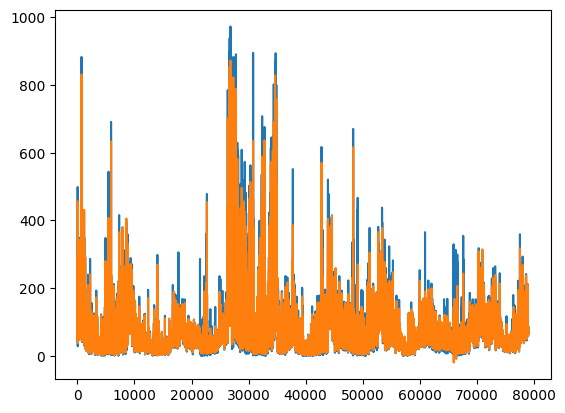

In [73]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [74]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9420067098140846


In [75]:
import joblib
joblib.dump(model, 'Bihar_PM2.5_µgm³.pkl')

['Bihar_PM2.5_µgm³.pkl']

In [76]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
pred_check2 = model.predict(X)

In [78]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9154436026194395


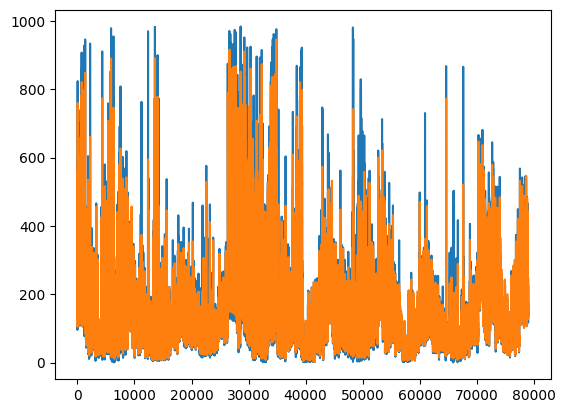

In [79]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [80]:
joblib.dump(model, 'Bihar_PM10_µgm³.pkl')

['Bihar_PM10_µgm³.pkl']